In [1]:
%matplotlib inline

from Bio.Seq import Seq
from Bio import SeqIO
from Bio.Alphabet import IUPAC
import pandas as pd
import numpy as np
#import scikitlearn as sk

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.ensemble import RandomForestClassifier

In [2]:
clf = RandomForestClassifier(n_estimators=10, random_state=0, oob_score=True)

# Importar dados
Importa os dados do arquivo ".fasta" e coloca em um `pd.DataFrame`.

Cada linha é uma amostra sequenciada.

Cada coluna (atributo) é uma posição na sequência genética com sua respectica base (acgt).

In [2]:
identifiers = [seq_record.id for seq_record in SeqIO.parse("toy_ZIKV.fasta", "fasta")]
seqs = np.array([list(str(seq_rec.seq)) for seq_rec in SeqIO.parse("toy_ZIKV.fasta", "fasta")])
#print(seqs)

df = pd.DataFrame(seqs, index=identifiers)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
KX377336,c,c,g,g,c,a,t,a,c,a,...,a,a,g,g,t,a,t,g,t,c
KX694533,c,c,g,g,c,a,t,a,c,a,...,a,a,g,g,t,a,t,g,t,c
HQ234499,c,c,g,g,c,a,t,a,c,a,...,a,a,g,g,t,a,t,g,t,c
KX601167,c,c,g,g,c,a,t,a,c,a,...,a,a,g,g,t,a,t,g,t,c
MF801404,c,c,g,g,c,a,t,a,c,a,...,a,a,g,g,t,a,t,g,t,c


# Vetor de "classes"
Criar o vetor `Y` contendo as classes associadas a cada amostra. 

- 1: Amostras Americanas
- 0: Amostras Africanas

In [3]:
Y = np.zeros(22)
Y[0:10]=1
print(Y)
#print(Y.shape)
#print(df.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# One-Hot Encoding
Aplicar o "one-hot encoding" para tratar os dados.

Como os dados genômicos são categóricos (ACGT), devem ser preparados de forma que fiquem adequados ao algoritmo de machine learning.

O método abaixo `pd.get_dummies(df)` transforma cada coluna com atributos categóricos (com "c" categorias, no nosso caso 4 categorias, ACGT) em "c" colunas contendo 0 em todas posições, exceto na posição correspondente ao valor presente naquele atributo.

Assim:

|sample|base1|base2|
|------|-----|-----|
|s_1   |A    |T    |
|s_2   |A    |G    |
|s_3   |C    |T    |

Se tornaria:

|sample|base1_A|base1_C|base1_G|base1_T|base2_A|base2_C|base2_G|base2_T|
|------|-------|-------|-------|-------|-------|-------|-------|-------|
|s_1   |1      |0      |0      |0      |0      |0      |0      |1      |
|s_2   |1      |0      |0      |0      |0      |0      |1      |0      |
|s_3   |0      |1      |0      |0      |0      |0      |0      |1      |

In [4]:
X = pd.get_dummies(df)
X.head()

,0_c,1_c,2_g,3_g,4_c,5_a,6_t,7_a,8_c,9_a,...,50_g,51_g,52_g,53_c,53_t,54_a,55_t,56_g,57_t,58_c
KX377336,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
KX694533,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
HQ234499,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
KX601167,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
MF801404,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1


# Criar o classificador Random Forest
Para esse exemplo, vamos usar uma Random Forest com 100 árvores, fixando o `random state = 0` para reprodutibilidade e marcando o `oob_score = True` para que os dados não utilizados em cada "bootstrapping" sejam usados para validação.

In [5]:
clf = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True)

In [6]:
clf.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

# Feature importance

Abaixo está uma lista contendo a "importância" de cada um dos atributos.

A seguir, um gráfico para ajudar a visualizar. No eixo "x" estão os atributos (ou seja, a posição no genoma) e no eixo "y" está o valor de importância.

In [7]:
print(clf.feature_importances_)
print("\n")


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02229469
 0.03135349 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.10647059 0.1        0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.04307692 0.09
 0.         0.         0.00916005 0.0085987  0.         0.
 0.13051687 0.10754902 0.         0.         0.         0.
 0.         0.11097967 0.06       0.         0.         0.1
 0.08       0.         0.         0.         0.         0.        ]




In [8]:
positions = np.where(clf.feature_importances_>0.0)
positions

(array([11, 12, 24, 25, 40, 41, 44, 45, 48, 49, 55, 56, 59, 60]),)

In [9]:
x = X.columns
y = clf.feature_importances_
xaxis = np.where(y > 0.0, 1, 0)

In [10]:
def format_func(value, tick_number):
    if y[value] > 0.0:
        return x[tick_number]
    else:
        return ''

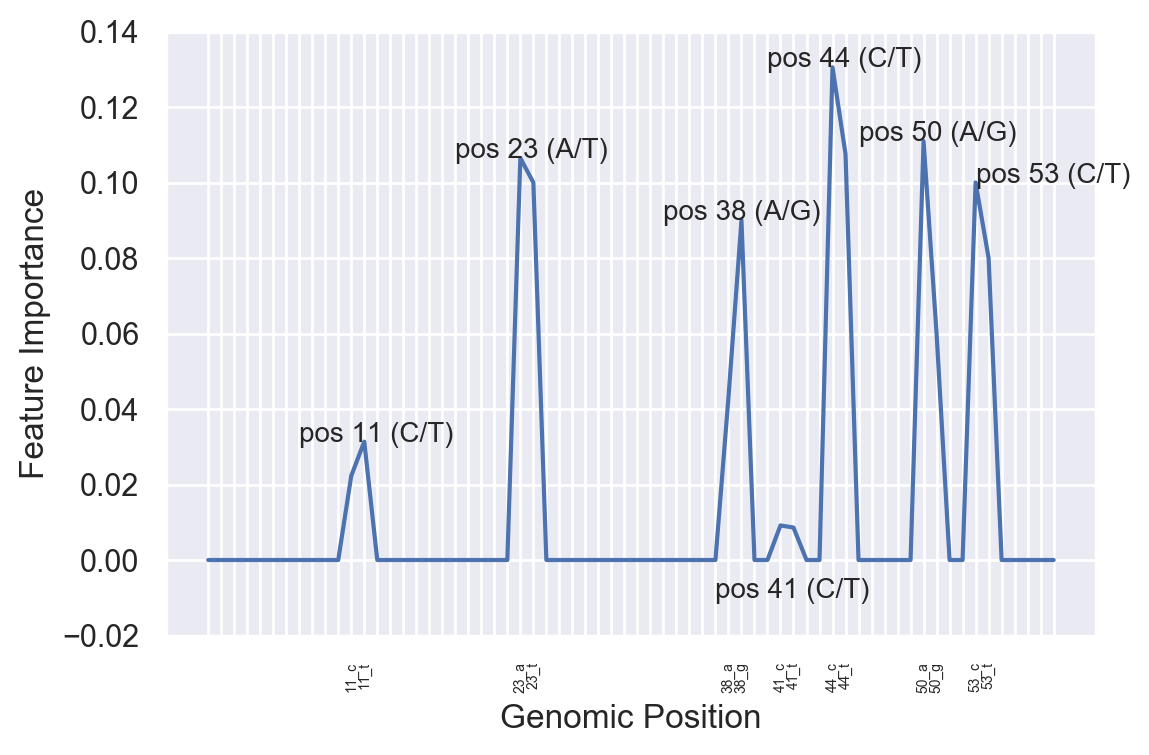

In [11]:
fig, ax = plt.subplots()
fig.dpi=200
plt.xticks(range(len(xaxis)), xaxis, size=5, rotation='vertical')
plt.xlabel("Genomic Position")
plt.ylabel("Feature Importance")
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.ylim(-0.02, 0.14)

plt.plot(x,y)

plt.annotate('pos 11 (C/T)', xy=(12-5, clf.feature_importances_[12]))
plt.annotate('pos 23 (A/T)', xy=(24-5, clf.feature_importances_[24]))
plt.annotate('pos 38 (A/G)', xy=(40-5, clf.feature_importances_[41]))
plt.annotate('pos 41 (C/T)', xy=(44-5, -0.01))
plt.annotate('pos 44 (C/T)', xy=(48-5, clf.feature_importances_[48]))
plt.annotate('pos 50 (A/G)', xy=(55-5, clf.feature_importances_[55]))
plt.annotate('pos 53 (C/T)', xy=(59, clf.feature_importances_[59]))

plt.savefig(fname="importance_plot")
plt.show()

# Fig 1 - Feature Importance
Na figura acima, podem ser observadas as posicões genômicas no eixo x, com as respectivas bases, e a importância relativa de cada uma delas.

In [12]:
col = X.columns
values = np.array([clf.feature_importances_])

importance = pd.DataFrame(values, columns=col)


In [13]:
max_imp = importance.values[0].max()
max_pos = importance.idxmax(axis=1)

## Posição mais importante
Pode ser observado abaixo a posição com maior importância, assim como todas as outras identificadas no procedimento.

In [14]:
print('The position with highest importance is {0}'.format(max_pos[0]))

The position with highest importance is 44_c


In [15]:
for base in importance:
    if importance[base].values[0] > 0:
        print('Base {0} has importance {1}.\n'.format(base, importance[base].values[0]))

Base 11_c has importance 0.022294692235868708.

Base 11_t has importance 0.031353485838779956.

Base 23_a has importance 0.10647058823529414.

Base 23_t has importance 0.1.

Base 38_a has importance 0.043076923076923075.

Base 38_g has importance 0.09.

Base 41_c has importance 0.00916005291005291.

Base 41_t has importance 0.008598699095022625.

Base 44_c has importance 0.13051686507936508.

Base 44_t has importance 0.10754901960784313.

Base 50_a has importance 0.11097967392085041.

Base 50_g has importance 0.06.

Base 53_c has importance 0.1.

Base 53_t has importance 0.08.

